In [15]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import dask.array as da
import netCDF4

import multiprocessing

# Get the number of available CPU cores
num_cores = multiprocessing.cpu_count()

print(f"Number of CPU cores: {num_cores}")


Number of CPU cores: 8


In [16]:
a = netCDF4.Dataset('openmars_my34_ls159_my34_ls176.nc',chunks={'time': 5})
print(a.dimensions)
print(a.variables.keys())

{'lev': <class 'netCDF4._netCDF4.Dimension'>: name = 'lev', size = 70, 'lon': <class 'netCDF4._netCDF4.Dimension'>: name = 'lon', size = 72, 'lat': <class 'netCDF4._netCDF4.Dimension'>: name = 'lat', size = 36, 'time': <class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 720}
dict_keys(['lon', 'lat', 'lev', 'time', 'Ls', 'MY', 'ps', 'tsurf', 'co2ice', 'dustcol', 'u', 'v', 'temp', 'vmr_h2ovap', 'vapcol'])


In [19]:
lats = a.variables['lat'][:]  # Latitude
lons = a.variables['lon'][:]  # Longitude
temp = a.variables['tsurf'][:]     # Water vapour vmr at eleventh model level


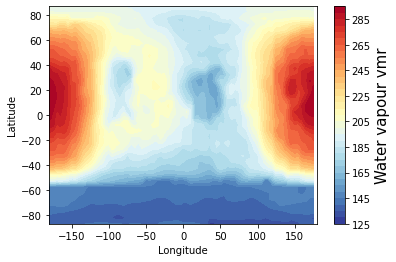

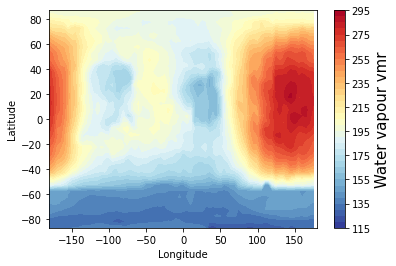

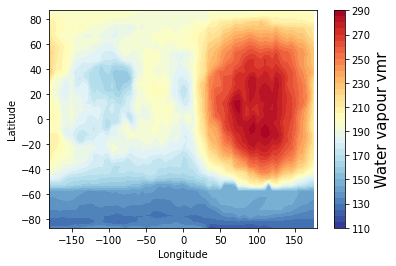

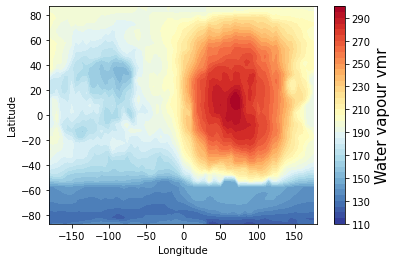

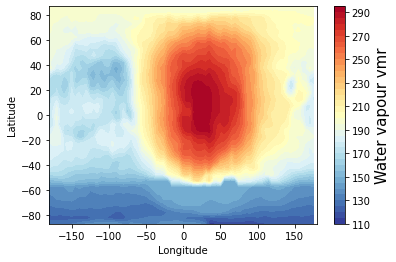

In [20]:
for i in np.linspace(0,10,5,dtype=int):
    fig = plt.figure()
    CS1 = plt.contourf(lons, lats, temp[i,:,:], 40, cmap='RdYlBu_r')
    cbar = plt.colorbar(CS1)
    cbar.set_label('Water vapour vmr',fontsize=15)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.axis([-180, 180, -87, 87])
    
    

In [21]:
import xarray as xr
a2 = xr.open_dataset('openmars_my34_ls159_my34_ls176.nc', chunks={'time': 5})
lat2 = a2['lat']
lon2 = a2['lon']
temp2 = a2['tsurf'][:]
timerange = a2['time']
print(timerange)


<xarray.DataArray 'time' (time: 720)>
array([7021.0415, 7021.0835, 7021.125 , ..., 7050.9165, 7050.9585, 7051.    ],
      dtype=float32)
Coordinates:
  * time     (time) float32 7.021e+03 7.021e+03 ... 7.051e+03 7.051e+03
Attributes:
    FIELDNAM:  Martian sol
    CATDESC:   Martian sol in which sol 0 refers to the beginning of Mars yea...
    FORMAT:    REAL*4
    MONOTON:   INCREASE
    UNITS:     Sol
    VAR_TYPE:  support_data


<xarray.DataArray 'lat' (lat: 17)>
array([87.49999 , 82.49999 , 77.5     , 72.5     , 67.5     , 62.5     ,
       57.499996, 52.500004, 47.500004, 42.499996, 37.5     , 32.5     ,
       27.5     , 22.5     , 17.5     , 12.500001,  7.500001], dtype=float32)
Coordinates:
  * lat      (lat) float32 87.5 82.5 77.5 72.5 67.5 ... 27.5 22.5 17.5 12.5 7.5
Attributes:
    FIELDNAM:  Latitude
    CATDESC:   Latitude in which positive/negative indicates northern/southern
    FORMAT:    REAL*4
    MONOTON:   DECREASE
    UNITS:     Degrees
    VAR_TYPE:  support_data


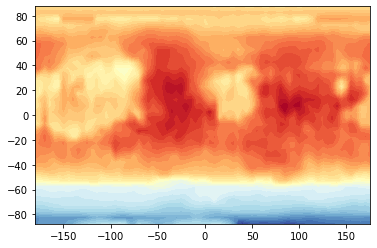

In [22]:
temp2min = temp2.min(dim='time')
temp2max = temp2.max(dim='time')
temp2mean_temporal = temp2.mean(dim='time')
temp2mean_spatial = temp2.mean(dim=('lat','lon'))
temp2mean_temporal_fixloc = temp2.sel(lat=slice(4),lon=slice(50,100)).mean(dim=('time'))
lat2_fixloc = lat2.sel(lat=slice(4))
lon2_fixloc = lon2.sel(lon=slice(50,100))
print(lat2_fixloc)

fig2 = plt.figure()
plt.contourf(lon2, lat2, temp2min, 40, cmap='RdYlBu_r')

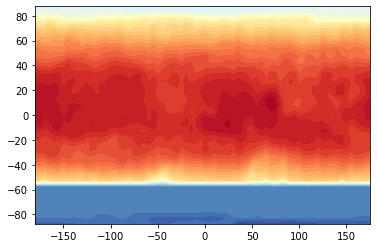

In [23]:
fig3 = plt.figure()
plt.contourf(lon2, lat2, temp2max, 40, cmap='RdYlBu_r')

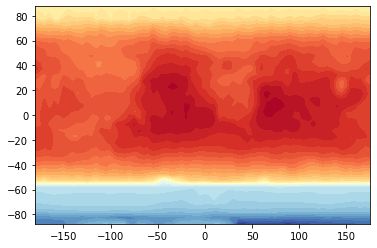

In [24]:
fig4 = plt.figure()
plt.contourf(lon2, lat2, temp2mean_temporal, 40, cmap='RdYlBu_r')

(17,)
(11,)
(17, 11)


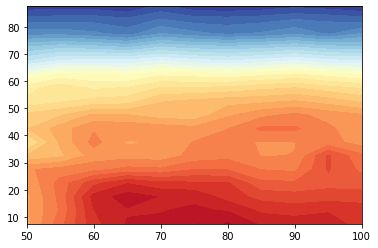

In [25]:
fig4b = plt.figure()
print(lat2_fixloc.shape)
print(lon2_fixloc.shape)
print(temp2mean_temporal_fixloc.shape)
plt.contourf(lon2_fixloc,lat2_fixloc,temp2mean_temporal_fixloc, 40, cmap='RdYlBu_r')

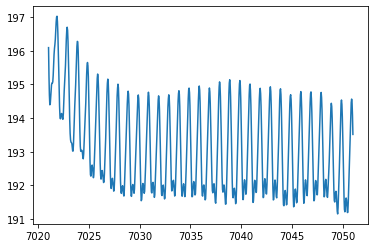

In [26]:
fig4 = plt.figure()
plt.plot(timerange,temp2mean_spatial)

In [27]:
# check data types
print(f'data type of temp2mean is {temp2mean_spatial.dtype}')
print(f'shape of temp2mean_temporal is {temp2mean_spatial.shape}')
print(f'shape of temp2mean_temporal is {temp2mean_temporal.shape}')
print(f'time range is {len(timerange)}')

data type of temp2mean is float32
shape of temp2mean_temporal is (720,)
shape of temp2mean_temporal is (36, 72)
time range is 720


In [ ]:
''' #test dask
# Create two large Dask arrays

#from dask.distributed import Client, LocalCluster
#cluster = LocalCluster(n_workers=8, threads_per_worker=4, memory_limit='2GB')
#client = Client(cluster)
a = da.random.random((10000, 10000), chunks=(1000, 1000))
b = da.random.random((10000, 10000), chunks=(1000, 1000))

# Perform a parallel computation on the arrays
result = a + b

# Compute the result and retrieve the data as a NumPy array
result_np = result.compute()

# Print some information about the result
print(f"Result shape: {result_np.shape}")
print(f"Result dtype: {result_np.dtype}")
print(f"i,jth entry of the result is {result_np[0, 0]}") '''